# Setup

In [ ]:
import pandas as pd
ds_train = pd.read_pickle('pickles/ds_train.pkl')
ds_test = pd.read_pickle('pickles/ds_test.pkl')

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer

tfid = TfidfVectorizer(max_df=0.95, min_df=2)

# train
vec_train = tfid.fit_transform(ds_train['preprocess'])
train_array = vec_train.toarray()
# test
vec_test = tfid.transform(ds_test['preprocess'])
test_array = vec_test.toarray()

# LDA Topic Modelling
from sklearn.decomposition import LatentDirichletAllocation

n_cats = 7
lda = LatentDirichletAllocation(n_components=n_cats, random_state=3)
lda_train = lda.fit_transform(train_array)
lda_test = lda.transform(test_array)

In [37]:
# most common words
def top_words(lda_model, vectorizer, n_top_words=10):

    topics = lda_model.components_

    feature_names = vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(topics):
        print(f"Topic #{topic_idx + 1}:")
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]  # Get indices of top words
        top_words = [feature_names[i] for i in top_words_idx]
        print("Top words:", top_words)

top_words(lda, tfid)

Topic #1:
Top words: ['stephanopoulos', 'anas', 'loser', 'cci', 'ni', 'palestineans', 'ashok', 'scrolls', 'sipps', '1069']
Topic #2:
Top words: ['projector', 'uv', 'dos6', 'lssu', 'coreldraw', 'joysticks', 'scodal', 'ahhh', 'rainer', 'xopendisplay']
Topic #3:
Top words: ['the', 'to', 'of', 'and', 'is', 'in', 'that', 'it', 'you', 'for']
Topic #4:
Top words: ['scsi1', 'scsi2', 'convertible', 'keller', 'ivy', 'quakers', 'champs', 'lopez', 'hello', 'xman']
Topic #5:
Top words: ['maxaxaxaxaxaxaxaxaxaxaxaxaxaxax', 'blah', 'ditto', 'retarded', 'subscribe', '3401', 'ites', 'mumble', 'dwi', 'regedit']
Topic #6:
Top words: ['shaftdrive', 'crohns', '45th', 'deletion', 'pp', 'wip', 'gm', 'inguiry', 'scorer', 'wheelie']
Topic #7:
Top words: ['jb', 'imake', 'breaker', 'lh', 'handshaking', '805', '486dx50', 'kp', '231', 'dortmund']


In [38]:
# predictions
# train
topic_train_preds = lda_train.argmax(axis=1)
ds_train['pred'] = topic_train_preds

# test
topic_test_preds = lda_test.argmax(axis=1)
ds_test['pred'] = topic_test_preds

In [39]:
ds_train.head()

,text,label,label_text,simple_topic,preprocess,no_stopword,pred
0,I was wondering if anyone out there could enli...,7,rec.autos,3,i was wondering if anyone out there could enli...,"[ , w, , w, n, e, r, n, g, , f, , n, n, e, ...",2
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,1,a fair number of brave souls who upgraded thei...,"[ , f, r, , n, u, b, e, r, , f, , b, r, v, ...",2
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,1,well folks my mac plus finally gave up the gho...,"[w, e, l, l, , f, l, k, , , c, , p, l, u, ...",2
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics,1,do you have weiteks addressphone number id l...,"[ , , u, , h, v, e, , w, e, e, k, , r, e, ...",2
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,4,from article by tom a baker my understandi...,"[f, r, , r, c, l, e, , , b, , , , , b, ...",2


In [40]:
ds_test.head()

,text,label,label_text,simple_topic,preprocess,no_stopword,pred
0,I am a little confused on all of the models of...,7,rec.autos,3,i am a little confused on all of the models of...,"[ , , , l, l, e, , c, n, f, u, e, , n, , ...",2
1,I'm not familiar at all with the format of the...,5,comp.windows.x,1,im not familiar at all with the format of thes...,"[ , n, , f, l, r, , , l, l, , w, h, , h, ...",2
2,"\nIn a word, yes.\n",0,alt.atheism,0,in a word yes,"[ , n, , , w, r, , e, ]",2
3,\nThey were attacking the Iraqis to drive them...,17,talk.politics.mideast,6,they were attacking the iraqis to drive them ...,"[ , h, e, , w, e, r, e, , c, k, n, g, , h, ...",2
4,\nI've just spent two solid months arguing tha...,19,talk.religion.misc,6,ive just spent two solid months arguing that ...,"[ , v, e, , j, u, , p, e, n, , w, , l, , ...",2


In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
def check_accuracy(true,predicted):
    accuracy = accuracy_score(true,predicted)
    return accuracy

acc_train = check_accuracy(ds_train['simple_topic'],ds_train['pred'])
acc_test = check_accuracy(ds_test['simple_topic'],ds_test['pred'])

([<matplotlib.axis.YTick at 0x1c16bf31650>,
 [Text(0, 0, '0'),
  Text(0, 2000, '2000'),
  Text(0, 4000, '4000'),
  Text(0, 6000, '6000'),
  Text(0, 8000, '8000'),
  Text(0, 10000, '10000'),
  Text(0, 12000, '12000')])

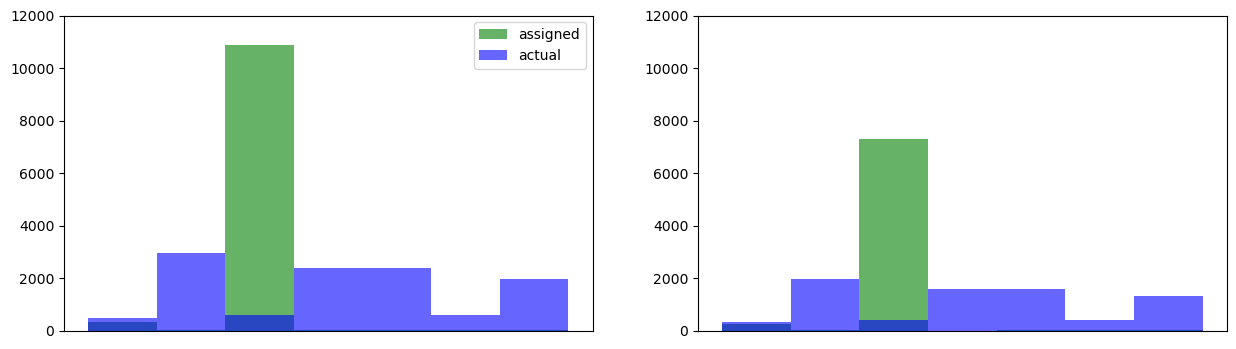

In [43]:
# Visualization
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.hist(ds_train['pred'],bins=7,color='green',alpha=0.6,label='assigned')
plt.hist(ds_train['simple_topic'],bins=7,color='blue',alpha=0.6,label='actual')
plt.xticks([])
plt.yticks(np.arange(0,13000,2000))
plt.legend()

plt.subplot(2,2,2)
plt.hist(ds_test['pred'],bins=7,color='green',alpha=0.6,label='assigned')
plt.hist(ds_test['simple_topic'],bins=7,color='blue',alpha=0.6)
plt.xticks([])
plt.yticks(np.arange(0,13000,2000))

In [45]:
print('Accuracy:\n Train:',acc_train,'\n Test:',acc_test)

Accuracy:
 Train: 0.05320841435389782 
 Test: 0.051911842804036115
